In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['axes.titlesize'] = 16

In [21]:
typeSpecification = {"Aircraft Model": str, "Engine Model": str, "Engine3 Position": str, "Engine1 Position": str}
df = pd.read_csv('../database/aircraft_wildlife_strikes.zip', compression='zip', dtype=typeSpecification)

Radome Damage


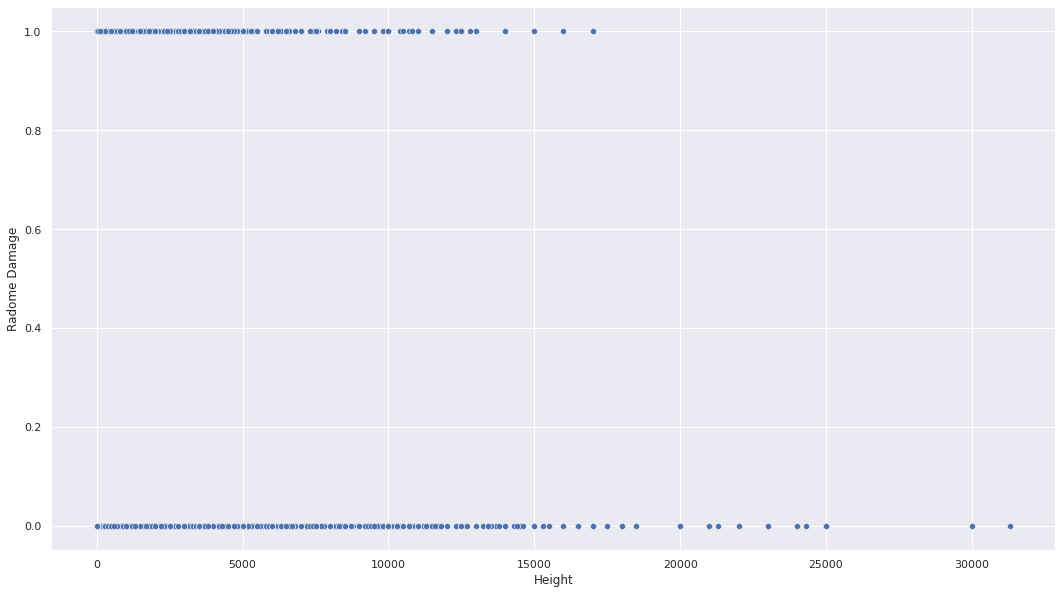

Windshield Damage


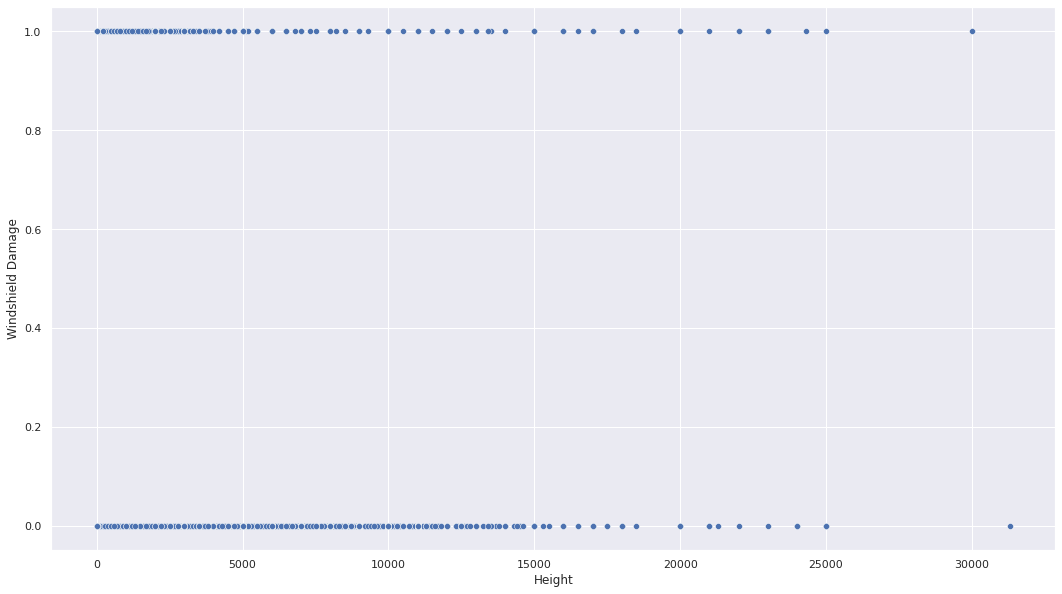

Nose Damage


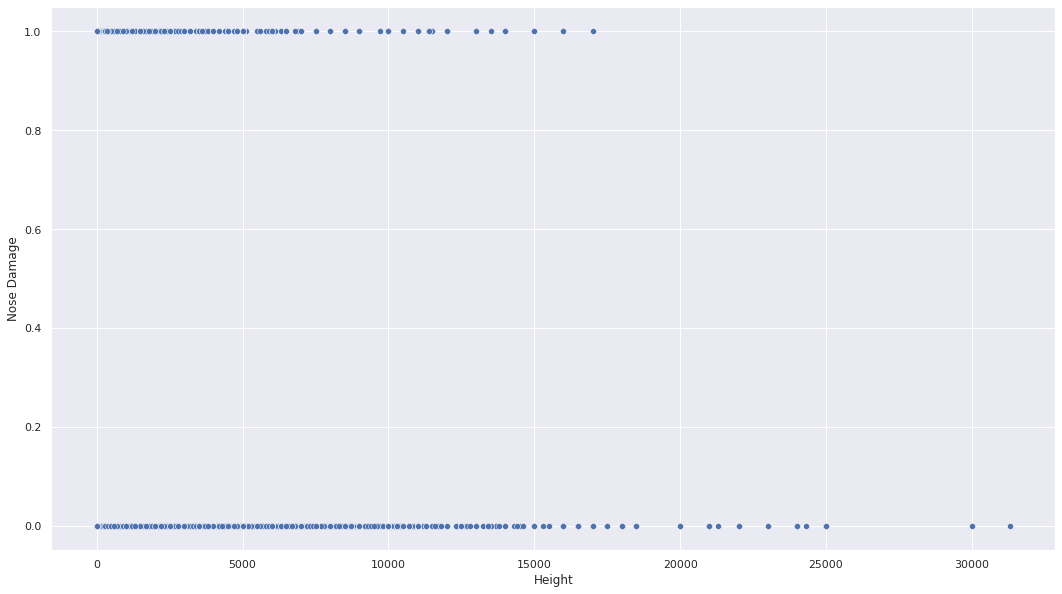

Engine1 Damage


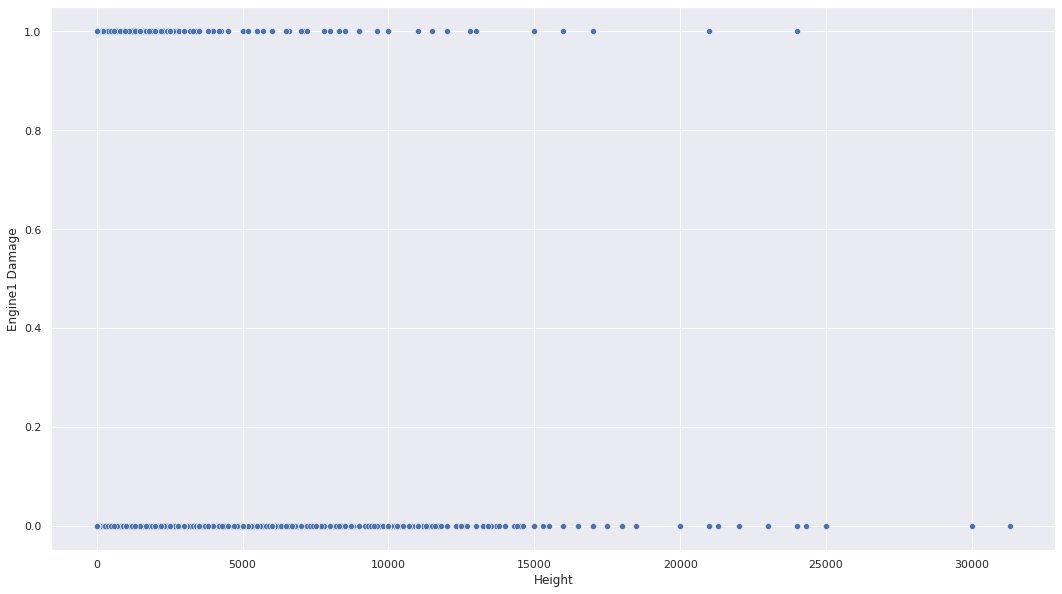

Engine2 Damage


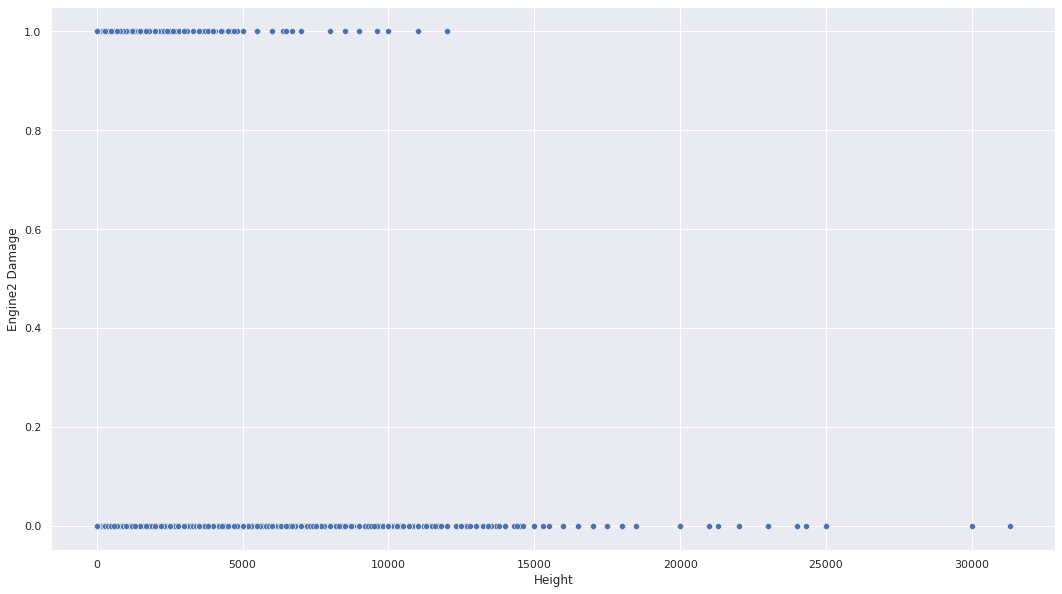

Engine3 Damage


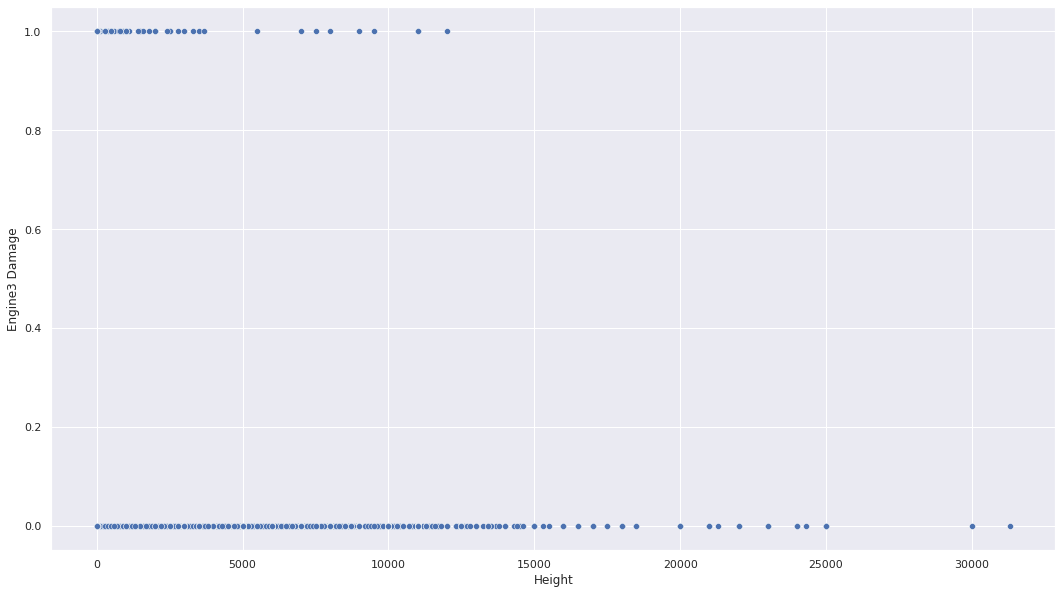

Engine4 Damage


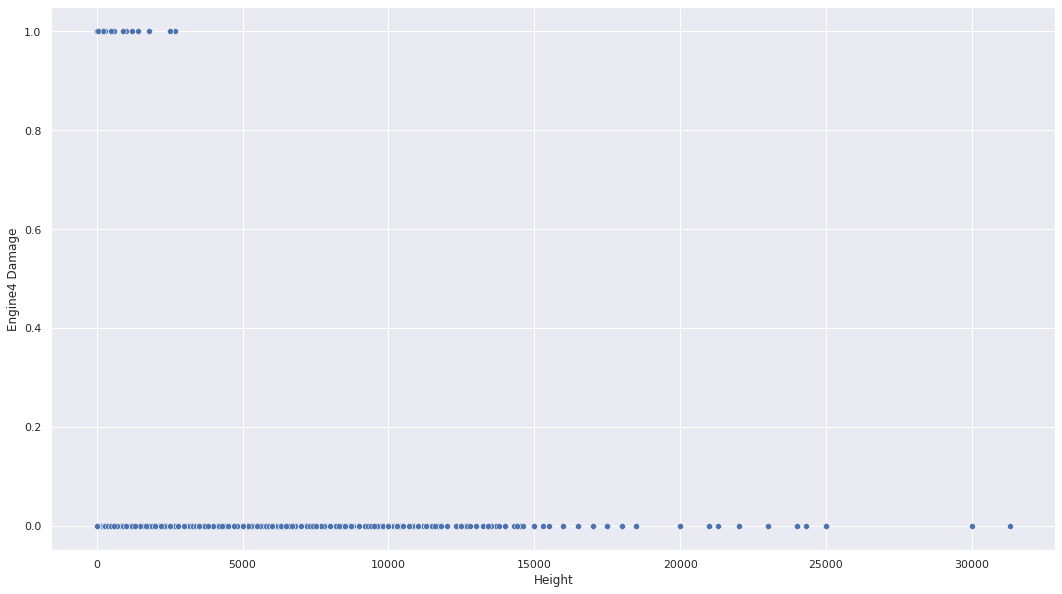

Propeller Damage


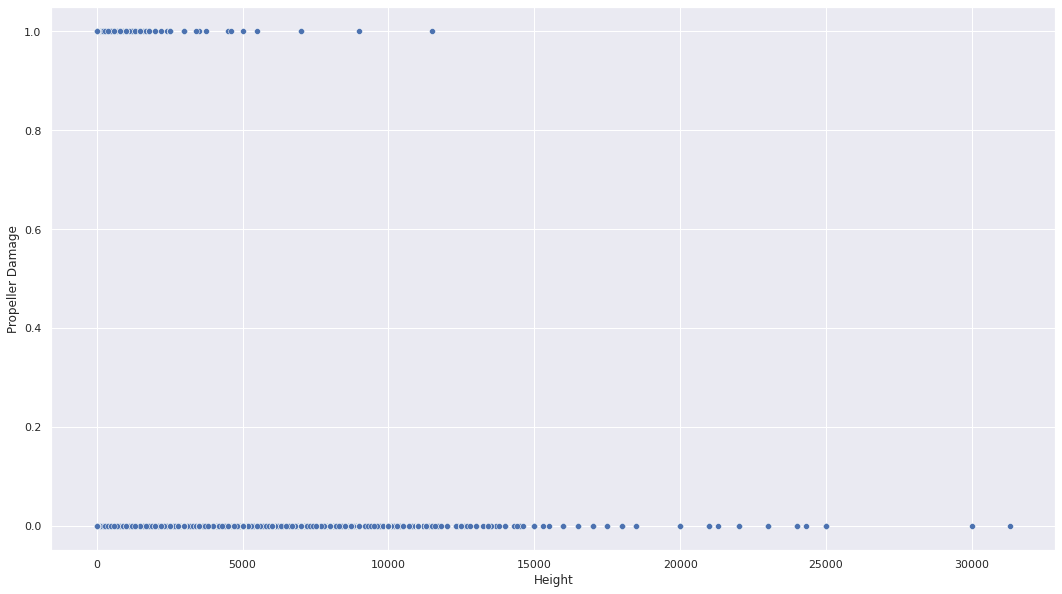

Wing or Rotor Damage


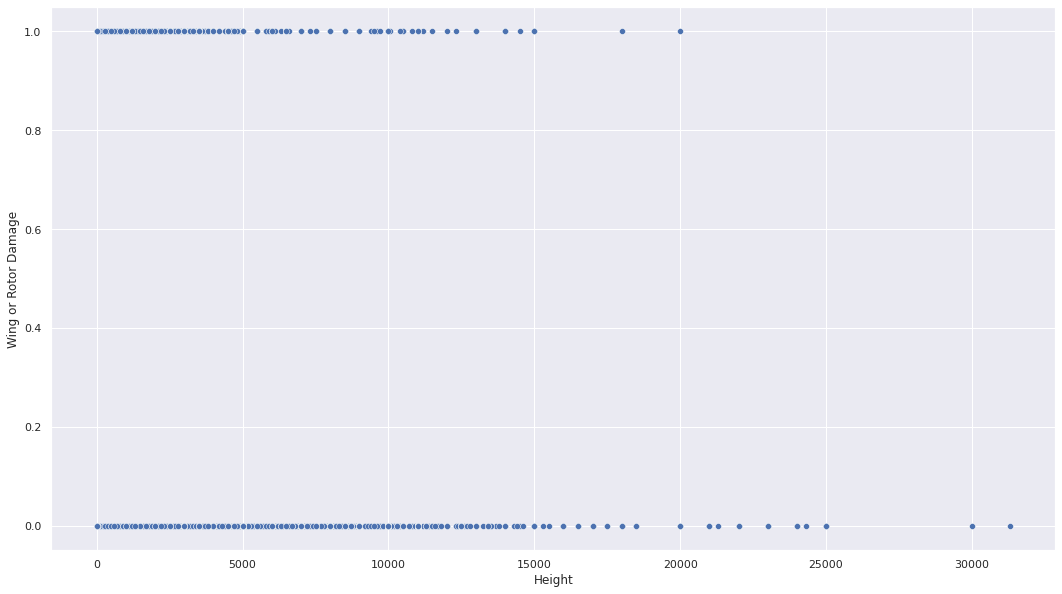

Fuselage Damage


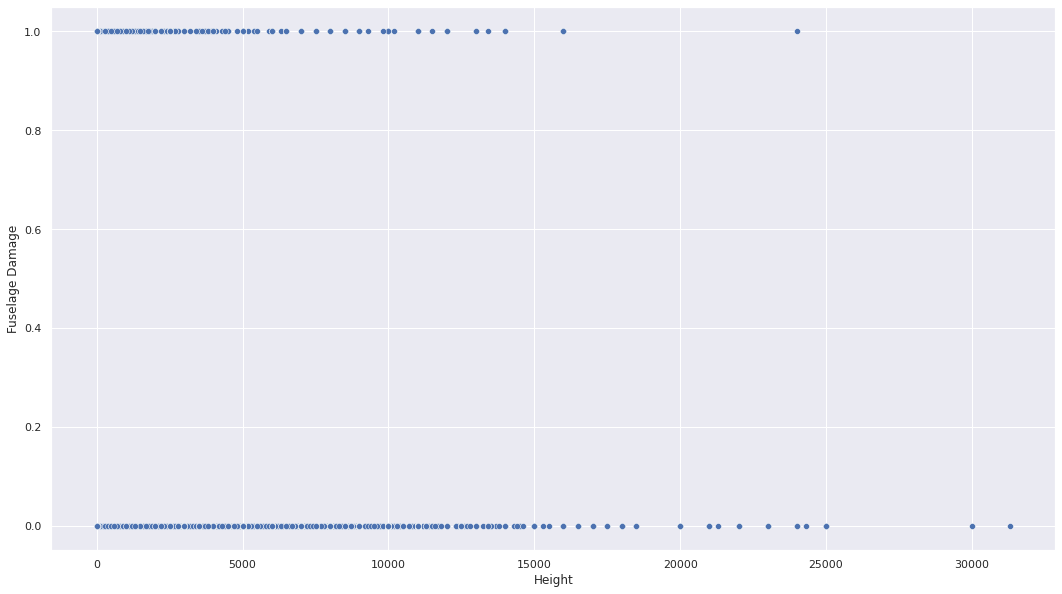

Landing Gear Damage


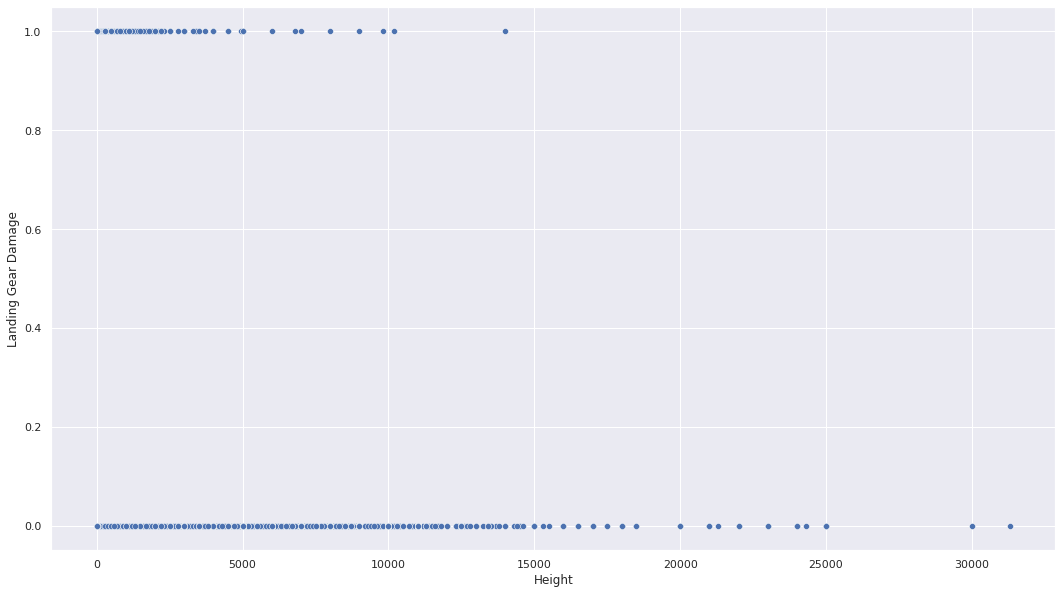

Tail Damage


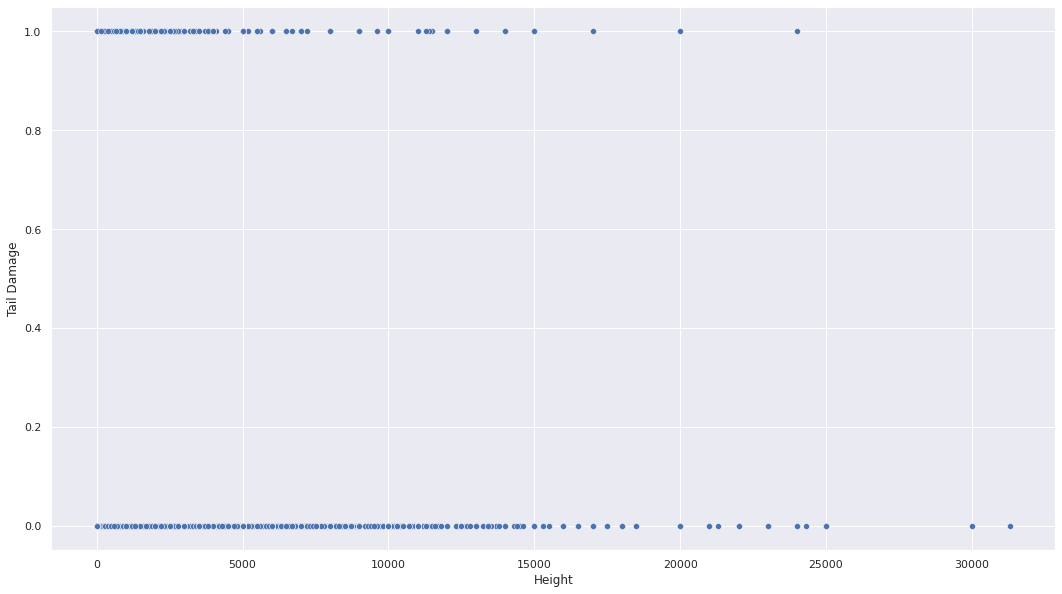

Lights Damage


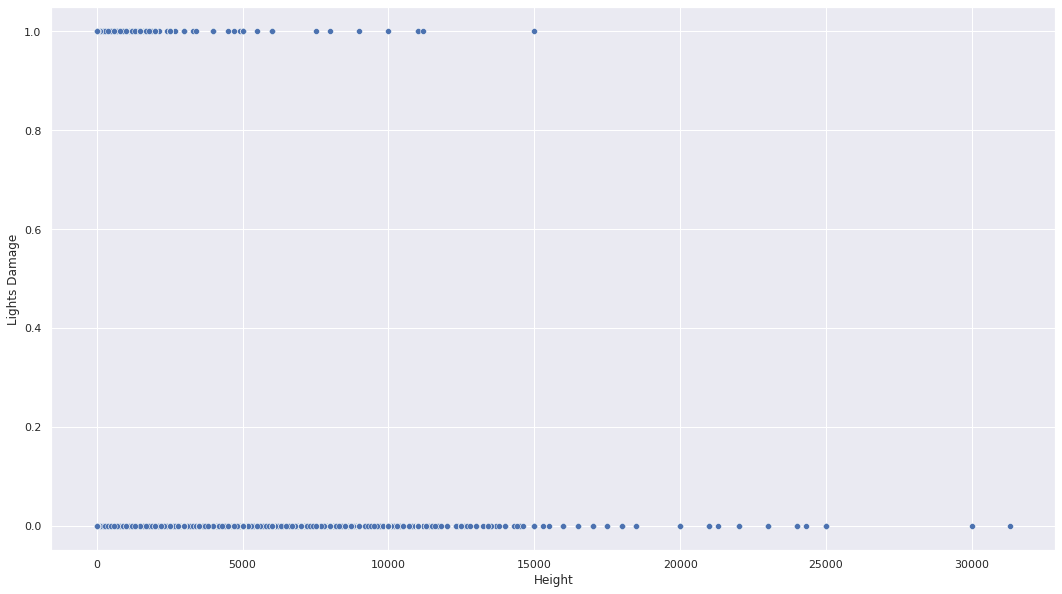

Other Damage


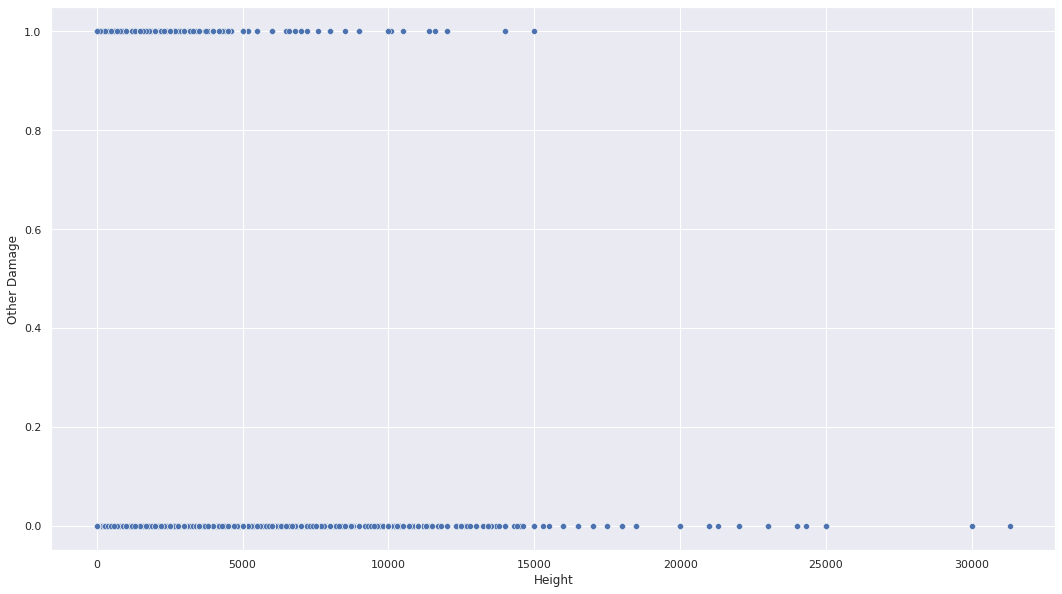

In [42]:
aircraft_parts =  ["Radome", "Windshield", "Nose", "Engine1", "Engine2", "Engine3", "Engine4", "Propeller", "Wing or Rotor", "Fuselage", "Landing Gear", "Tail", "Lights", "Other"]
aircraft_strikes = list(map(lambda x: x + " Strike", aircraft_parts))
aircraft_damages = list(map(lambda x: x + " Damage", aircraft_parts))
for attribute in aircraft_damages:
    print(attribute)
    sns.scatterplot(x=df["Height"], y=df[attribute])
    plt.show()

0.9917052469135802


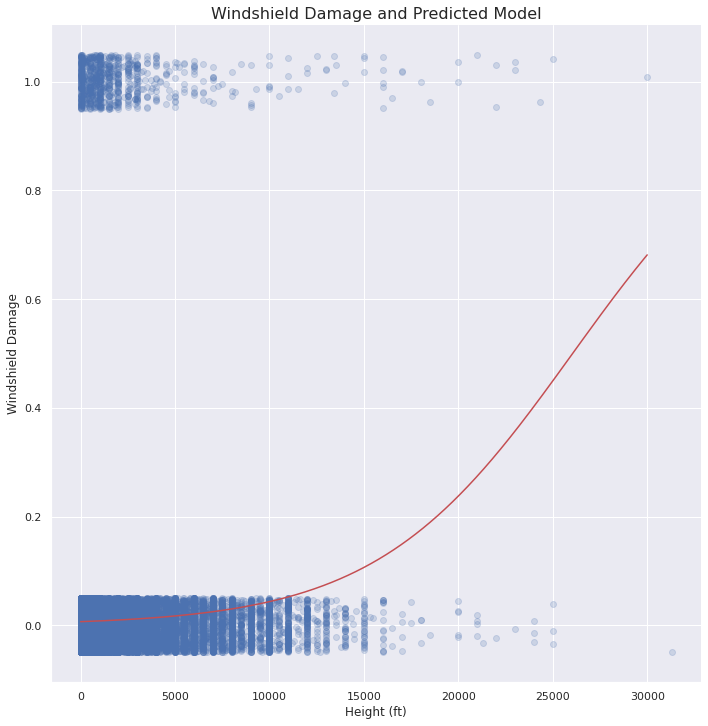

In [34]:
dados_interesse = df[['Height', 'Windshield Damage']].dropna()

treino_x, teste_x, treino_y, teste_y = train_test_split(dados_interesse["Height"], dados_interesse["Windshield Damage"])

treino_x = np.array(treino_x).reshape(-1,1)
teste_x = np.array(teste_x).reshape(-1,1)

modelo = LogisticRegression()
modelo = modelo.fit(treino_x,treino_y)

print(modelo.score(teste_x, teste_y))
(teste_y == modelo.predict(teste_x)).mean()

sns.lmplot(x='Height', y='Windshield Damage',
           data=dados_interesse,
           fit_reg=False, ci=False,
           y_jitter=0.05, height=10,
           scatter_kws={'alpha': 0.2})

xs = np.linspace(0, 30000, 10000)
ys = modelo.predict_proba(xs.reshape(-1, 1))[:, 1]
plt.plot(xs, ys, 'r')

plt.title('Windshield Damage and Predicted Model')
plt.xlabel('Height (ft)')
plt.ylabel('Windshield Damage');

In [37]:
df['Species Quantity'].unique()

array(['1', '2-10', nan, '11-100', 'Over 100'], dtype=object)